In [1]:
from Assemblies.game import GameField
import numpy as np
import time
from numpy import random

%matplotlib notebook
import matplotlib.pyplot as plt

<img src='1.4-1.8_title.png'></img>

## График из статьи

<img src='1.4-1.8_s1.png'></img>

- начальная плотность кооператоров 50% от общего числа активных игроков
- размер решётки 100x100
- 3000 шагов отжига и 500 шагов эволюции
- средние значения взяты по 500 шагам эволюции в 10 играх

In [2]:
eps=0.01
bs=np.array([8/5,9/5,2])+eps
L=100
cp=50

offp=np.linspace(80,0,num=20,dtype=int)

#в статье написано "100 samples", но пусть пока будет 10
seeds=np.zeros(10,dtype=int)
for i in range(10):
    seeds[i]=i+1

    
#информации по шагам отжига и эволюции я в статье не нашёл, поэтому пусть будет 3000 и 500 соответственно
burnin1=3000
evol1=500

In [3]:
#плотность для конкретного b
def c_density(size, coop_percentage, off_percentage, seed, burnin, evol, b): 
    random.seed(seed)
    instance = np.array(np.random.rand(size, size) <= 0.01 * off_percentage, dtype=int) * (-1)
    active_indexes=(-1-instance).nonzero()
    active_size=active_indexes[0].size
    active = np.array(np.random.rand(active_size) > 0.01 * coop_percentage, dtype=int)
    instance[active_indexes]=np.copy(active)

    density = np.zeros(evol)
    
    game = GameField(size, b)
    game.field = np.copy(instance)
    game.evolveQ(burnin)
    for step in range(evol):
        game.evolveQ(1)
        density[step] = np.count_nonzero(np.equal(game.field,0)) / size**2
    return density

In [4]:
#измеряем плотность для len(seeds) разных реализаций на протяжении evol1 шагов. 
#Сначала усредняем по реализациям, потом эту величину - по шагам.

#функция возвращает массив плотности по значениям off_percentage для определённого процента кооператоров и определённого b
def total_density(size, coop_percentage, off_percentage, seeds, burnin, evol, b):
    
    aver_all=np.zeros(len(off_percentage))
    for i in range(len(off_percentage)):
        den=np.zeros((len(seeds),evol1))

        for j in range(len(seeds)):
            den[j]=c_density(size, coop_percentage, off_percentage[i], seeds[j], burnin, evol, b)

        aver_seed=np.mean(den,axis=0)
        aver_all[i]=np.mean(aver_seed)

    return aver_all 

In [5]:
ds=np.zeros((len(bs),len(offp)))
for i in range(len(bs)):
    ds[i]=total_density(size=L, coop_percentage=cp, off_percentage=offp, seeds=seeds, burnin=burnin1, evol=evol1, b=bs[i])

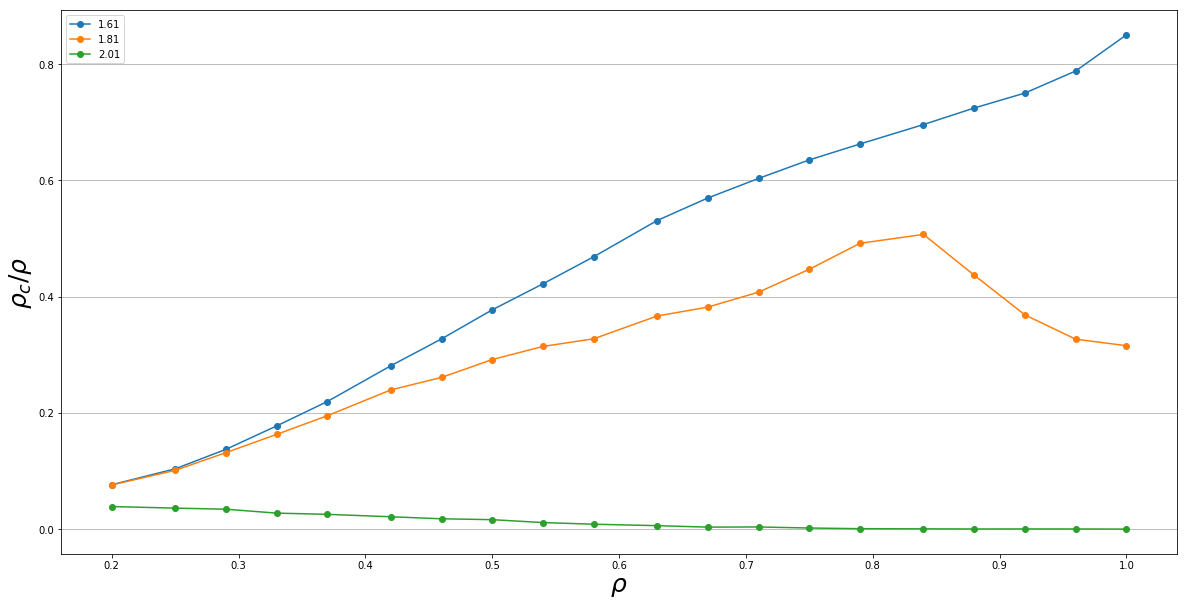

In [41]:
fig,ax=plt.subplots(1,1,figsize=(20,10))
ax.grid(b=True,axis='y')
for i in range(len(ds)):
    ax.plot(1-offp*0.01,ds[i],'o-',label=bs[i])

ax.set_xlabel('$%s$'%'\\rho',fontsize=25)
ax.set_ylabel('$%s$'%'\\rho_c/\\rho',fontsize=25)
ax.legend()    